<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW4/4105_HW4_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import sklearn

seed = 9

### Problem 1

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 

In [2]:
from sklearn.datasets import load_breast_cancer 

In [3]:
# Load Cancer Dataset and get ready for processing
breast = load_breast_cancer() 

breast_data = breast.data 

breast_labels = breast.target 
labels = np.reshape(breast_labels,(569,1)) 

final_breast_data = np.concatenate([breast_data,labels],axis=1) 
breast_dataset = pd.DataFrame(final_breast_data) 

features = breast.feature_names 
features_labels = np.append(features,'label') 


breast_dataset.columns = features_labels 

#breast_dataset['label'].replace(0, 'Benign',inplace=True) 
#breast_dataset['label'].replace(1, 'Malignant',inplace=True) 

#breast_dataset.tail() 

# Preprocessing
y = breast_dataset.pop('label')

X = breast_dataset.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

# Standarizing Dataset

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)


In [4]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

kernel_type = 'rbf'

acc = []
prec = []
rec = []
kk =[]


for K in range(1, 25):
  pca = RandomizedPCA(n_components=K, svd_solver = 'full', random_state=88)
  pca.fit(X_train_std)
  df_train_pca = pca.fit_transform(X_train_std)
  df_test_pca = pca.fit_transform(X_test_std)
  df_train_pca_std = sc.fit_transform(df_train_pca)
  df_test_pca_std = sc.fit_transform(df_test_pca)


  LR_PCA_Learner = SVC(kernel=kernel_type, class_weight='balanced')

  LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


  predicted = LR_PCA_Model.predict(df_test_pca)

  kk.append(K)
  acc.append(metrics.accuracy_score(y_test, predicted)) 
  prec.append(metrics.precision_score(y_test, predicted)) 
  rec.append(metrics.recall_score(y_test, predicted)) 

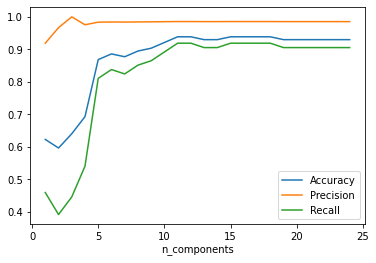

In [5]:
# Plot
plt.plot(kk,acc, label = "Accuracy")
plt.plot(kk,prec, label = "Precision")
plt.plot(kk,rec, label = "Recall")
plt.legend()
plt.xlabel("n_components")
plt.savefig("PCA_Plot.png")

In [6]:
optimal_K = np.argmax(acc) + 1
print("Optimum K is", optimal_K)

Optimum K is 11


2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
*See above

3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [7]:
kernel_types = ['linear','poly','rbf','sigmoid','precomputed']


pca = RandomizedPCA(n_components = optimal_K, svd_solver = 'full', random_state=88)
pca.fit(X_train_std)
df_train_pca = pca.fit_transform(X_train_std)
df_test_pca = pca.fit_transform(X_test_std)
df_train_pca_std = sc.fit_transform(df_train_pca)
df_test_pca_std = sc.fit_transform(df_test_pca)


for i in range(5):
  LR_PCA_Learner = SVC(kernel=kernel_types[0], class_weight='balanced')

  LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


  predicted = LR_PCA_Model.predict(df_test_pca)
  expected = y_test

  #Summarize model fit
  print("\n\nMetrics for ", kernel_types[i], " Kernel")
  print(metrics.classification_report(expected,predicted))



Metrics for  linear  Kernel
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        40
         1.0       0.99      0.93      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Metrics for  poly  Kernel
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        40
         1.0       0.99      0.93      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Metrics for  rbf  Kernel
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        40
         1.0       0.99      0.93      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94

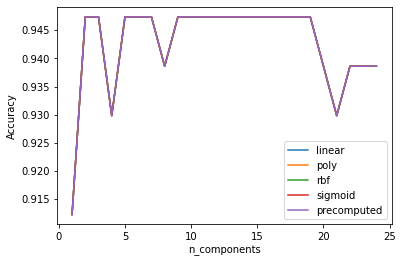

In [8]:
kernel_types = ['linear','poly','rbf','sigmoid','precomputed']

acc = np.zeros((5,24))

for i in range(5):
  kk =[]
  for K in range(1, 25):
    pca = RandomizedPCA(n_components=K, svd_solver = 'full', random_state=88)
    pca.fit(X_train_std)
    df_train_pca = pca.fit_transform(X_train_std)
    df_test_pca = pca.fit_transform(X_test_std)
    df_train_pca_std = sc.fit_transform(df_train_pca)
    df_test_pca_std = sc.fit_transform(df_test_pca)


    LR_PCA_Learner = SVC(kernel=kernel_types[0], class_weight='balanced')

    LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


    predicted = LR_PCA_Model.predict(df_test_pca)

    kk.append(K)
    acc[i,K-1] = metrics.accuracy_score(y_test, predicted)



# Plot
plt.plot(kk,acc[0], label = kernel_types[0])
plt.plot(kk,acc[1], label = kernel_types[1])
plt.plot(kk,acc[2], label = kernel_types[2])
plt.plot(kk,acc[3], label = kernel_types[3])
plt.plot(kk,acc[4], label = kernel_types[4])

plt.legend()
plt.xlabel("n_components")
plt.ylabel("Accuracy")
plt.savefig("Kernels_Accuracy_Plot.png")

### Problem 2

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.

In [9]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
varlist = ['mainroad', 'guestroom','basement','hotwaterheating', 'airconditioning', 'prefarea']
# Defining the mapping function
def binary_map(x):
  return x.map({'yes':1,'no':0})

housing[varlist] = housing[varlist].apply(binary_map)

np.random.seed(0)


num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking','prefarea', 'price']
dataset = housing[num_vars]

# Preprocessing
y = dataset.pop('price')

X = dataset.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

# Standarizing Dataset

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.fit_transform(X_test)

In [10]:
kernel_types = ['linear','poly','rbf']

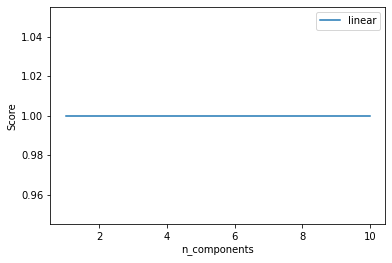

In [12]:
from sklearn.svm import SVR

kernel_type = kernel_types[0]

acc = []
prec = []
rec = []
kk =[]


for K in range(1, 11):
  pca = RandomizedPCA(n_components=K, svd_solver = 'full', random_state=88)
  pca.fit(X_train_std)
  df_train_pca = pca.fit_transform(X_train_std)
  df_test_pca = pca.fit_transform(X_test_std)
  df_train_pca_std = sc.fit_transform(df_train_pca)
  df_test_pca_std = sc.fit_transform(df_test_pca)


  LR_PCA_Learner = SVR(kernel=kernel_type, C=1e6)

  LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


  predicted = LR_PCA_Model.predict(df_test_pca)
  #predicted = predicted.reshape(-1, 1)



  kk.append(K)
  acc.append(LR_PCA_Model.score(df_test_pca, predicted)) 

# Plot
plt.plot(kk,acc, label = kernel_type)
#plt.plot(kk,prec, label = "Precision")
#plt.plot(kk,rec, label = "Recall")
plt.legend()
plt.xlabel("n_components")
plt.ylabel("Score")
plt.savefig("PCA_Plot.png")

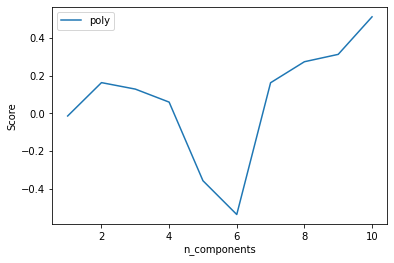

In [13]:
from sklearn.svm import SVR

kernel_type = kernel_types[1]

acc = []
prec = []
rec = []
kk =[]


for K in range(1, 11):
  pca = RandomizedPCA(n_components=K, svd_solver = 'full', random_state=88)
  pca.fit(X_train_std)
  df_train_pca = pca.fit_transform(X_train_std)
  df_test_pca = pca.fit_transform(X_test_std)
  df_train_pca_std = sc.fit_transform(df_train_pca)
  df_test_pca_std = sc.fit_transform(df_test_pca)


  LR_PCA_Learner = SVR(kernel=kernel_type, C=1e6)

  LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


  #predicted = LR_PCA_Model.predict(df_test_pca)
  #predicted = predicted.reshape(-1, 1)



  kk.append(K)
  acc.append(LR_PCA_Model.score(df_test_pca, predicted)) 

# Plot
plt.plot(kk,acc, label = kernel_type)
#plt.plot(kk,prec, label = "Precision")
#plt.plot(kk,rec, label = "Recall")
plt.legend()
plt.xlabel("n_components")
plt.ylabel("Score")
plt.savefig("PCA_Plot.png")

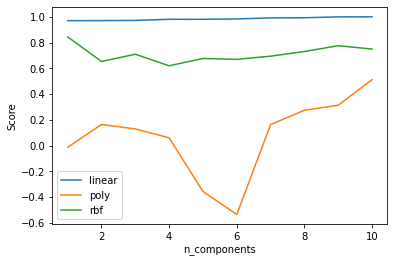

In [14]:
from sklearn.svm import SVR

for s in range(3):
  kernel_type = kernel_types[s]

  acc = []
  prec = []
  rec = []
  kk =[]


  for K in range(1, 11):
    pca = RandomizedPCA(n_components=K, svd_solver = 'full', random_state=88)
    pca.fit(X_train_std)
    df_train_pca = pca.fit_transform(X_train_std)
    df_test_pca = pca.fit_transform(X_test_std)
    df_train_pca_std = sc.fit_transform(df_train_pca)
    df_test_pca_std = sc.fit_transform(df_test_pca)


    LR_PCA_Learner = SVR(kernel=kernel_type, C=1e6)

    LR_PCA_Model = LR_PCA_Learner.fit(df_train_pca_std, y_train)


    #predicted = LR_PCA_Model.predict(df_test_pca)
    #predicted = predicted.reshape(-1, 1)



    kk.append(K)
    acc.append(LR_PCA_Model.score(df_test_pca, predicted)) 

  # Plot
  plt.plot(kk,acc, label = kernel_type)
  #plt.plot(kk,prec, label = "Precision")
  #plt.plot(kk,rec, label = "Recall")
plt.legend()
plt.xlabel("n_components")
plt.ylabel("Score")
plt.savefig("PCA_Plot.png")